# Exercise practicing with Beautiful Soup

Get all the Toronto's Neoighborhood from this Wikipedia's link:

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

## Exercise 1
1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

3. To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
4. Submit a link to your Notebook on your Github repository. (10 marks)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples on how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

In [32]:
import requests
import pandas as pd

URL = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

#Created the timeline with get and read with .text
response = requests.get(URL)       #más información de requests aquí: https://es.python-requests.org/es/latest/user/quickstart.html
response.text

#Using pandas to read the tables
tables = pd.read_html(response.text)

#As we want the first table of this URL qwe select [0]
df = pd.DataFrame(tables[0])

#Removing N/A Boroughs
df = df[df.Borough != "Not assigned"]

#Replacing "/" for "," in Neighborhood
df["Neighborhood"] = df["Neighborhood"].apply(lambda x: x.replace("/",","))

#Unifying Borough and Neighborhood based on Postal Code
df = df.groupby("Postal Code").agg({"Borough":",".join,
                                    "Neighborhood":",".join}).reset_index()

In [33]:
df

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern , Rouge"
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
2,M1E,Scarborough,"Guildwood , Morningside , West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov..."
101,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam..."


In [34]:
df.shape

(103, 3)

## Exercise 2
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

```python
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
```

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

In [37]:
geospatial = pd.read_csv("Geospatial_Coordinates.csv", delimiter=",")
geospatial.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [42]:
#Adding lomngitude and latitude based on Postal Code
df_coord = df.merge(geospatial, on="Postal Code", how="left")

In [43]:
df_coord

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",43.739416,-79.588437


## Exercise 3

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make.
to generate maps to visualize your neighborhoods and how they cluster together.
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

## Importing the libraries

In [73]:
#Importing libraries
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.pyplot as plt

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

## Creating the folium map

In [45]:
address = 'Toronto, Ontario, CANADA'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [49]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_coord['Latitude'], df_coord['Longitude'], df_coord['Borough'], df_coord['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Importing Foursquare credentials

In [50]:
import os

os.chdir('C:\\Users\\Jota_Moreno\\Downloads\\Professional Certificate Data Science - IBM\\9. Capstone')
credentials = pd.read_excel("Foursquare.xlsx")

In [51]:
CLIENT_ID = credentials.loc[0,"CLIENT ID"]
CLIENT_SECRET = credentials.loc[0,"CLIENT SECRET"]
ACCESS_TOKEN = credentials.loc[0,"ACCESS_TOKEN"]
VERSION = '20180604'

## Exploring the neighborhoods in Toronto

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

manhattan_venues = getNearbyVenues(names=df_coord['Neighborhood'],
                                   latitudes=df_coord['Latitude'],
                                   longitudes=df_coord['Longitude']
                                  )

Malvern , Rouge
Rouge Hill , Port Union , Highland Creek
Guildwood , Morningside , West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park , Ionview , East Birchmount Park
Golden Mile , Clairlea , Oakridge
Cliffside , Cliffcrest , Scarborough Village West
Birch Cliff , Cliffside West
Dorset Park , Wexford Heights , Scarborough Town Centre
Wexford , Maryvale
Agincourt
Clarks Corners , Tam O'Shanter , Sullivan
Milliken , Agincourt North , Steeles East , L'Amoreaux East
Steeles West , L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview , Henry Farm , Oriole
Bayview Village
York Mills , Silver Hills
Willowdale , Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor , Wilson Heights , Downsview North
Northwood Park , York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill , Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West , Riverdale
India Bazaar , The Beaches 

In [57]:
toronto_venues = manhattan_venues.copy()

In [58]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood , Long Branch",10,10,10,10,10,10
"Bathurst Manor , Wilson Heights , Downsview North",18,18,18,18,18,18
Bayview Village,4,4,4,4,4,4
"Bedford Park , Lawrence Manor East",24,24,24,24,24,24
...,...,...,...,...,...,...
Willowdale,39,39,39,39,39,39
Woburn,4,4,4,4,4,4
Woodbine Heights,9,9,9,9,9,9


In [59]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 266 uniques categories.


## Analyzing each neighborhood

In [61]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
toronto_onehot.shape

(2148, 266)

In [69]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,"Alderwood , Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,"Bathurst Manor , Wilson Heights , Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,"Bedford Park , Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Willowdale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.025641,0.0,0.0,0.0,0.0
91,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
92,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0
93,"York Mills , Silver Hills",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [64]:
toronto_grouped.shape

(95, 266)

In [65]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge   0.2
1               Skating Rink   0.2
2  Latin American Restaurant   0.2
3             Breakfast Spot   0.2
4             Clothing Store   0.2


----Alderwood , Long Branch----
          venue  freq
0   Pizza Place   0.2
1           Gym   0.1
2  Skating Rink   0.1
3      Pharmacy   0.1
4   Coffee Shop   0.1


----Bathurst Manor , Wilson Heights , Downsview North----
              venue  freq
0              Bank  0.11
1       Coffee Shop  0.11
2  Sushi Restaurant  0.06
3             Diner  0.06
4        Restaurant  0.06


----Bayview Village----
                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2  Japanese Restaurant  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park , Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.08
1  Italian Restaurant  0.08
2          Restaurant  0.08
3         Coffee Shop  0.08
4    

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Clothing Store,Lounge,Breakfast Spot,Skating Rink,Drugstore,Eastern European Restaurant,Donut Shop,Deli / Bodega,Doner Restaurant
1,"Alderwood , Long Branch",Pizza Place,Coffee Shop,Pub,Gym,Skating Rink,Athletics & Sports,Pool,Sandwich Place,Pharmacy,Dessert Shop
2,"Bathurst Manor , Wilson Heights , Downsview North",Coffee Shop,Bank,Shopping Mall,Bridal Shop,Sushi Restaurant,Middle Eastern Restaurant,Deli / Bodega,Restaurant,Fried Chicken Joint,Pizza Place
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,"Bedford Park , Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Grocery Store,Pharmacy,Juice Bar,Liquor Store,Indian Restaurant,Ice Cream Shop


## Cluster Neighborhoods, K-Means and Elbow method to know the idoneus number of clusters

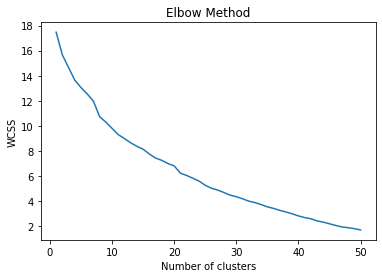

In [83]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(toronto_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The number of clusters seems to be 8

In [89]:
# set number of clusters
kclusters = 8

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 4, 0, 7, 0, 0, 0,
       0, 0, 7, 0, 0, 2, 7, 0, 6, 0, 7, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       1, 0, 0, 0, 0, 5, 1])

In [92]:
len(kmeans.labels_)

95

In [131]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Agincourt,Latin American Restaurant,Clothing Store,Lounge,Breakfast Spot,Skating Rink,Drugstore,Eastern European Restaurant,Donut Shop,Deli / Bodega,Doner Restaurant
1,0,"Alderwood , Long Branch",Pizza Place,Coffee Shop,Pub,Gym,Skating Rink,Athletics & Sports,Pool,Sandwich Place,Pharmacy,Dessert Shop
2,0,"Bathurst Manor , Wilson Heights , Downsview North",Coffee Shop,Bank,Shopping Mall,Bridal Shop,Sushi Restaurant,Middle Eastern Restaurant,Deli / Bodega,Restaurant,Fried Chicken Joint,Pizza Place
3,0,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,0,"Bedford Park , Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Grocery Store,Pharmacy,Juice Bar,Liquor Store,Indian Restaurant,Ice Cream Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,Willowdale,Pizza Place,Coffee Shop,Ramen Restaurant,Grocery Store,Sandwich Place,Café,Restaurant,Pharmacy,Discount Store,Hotel
91,0,Woburn,Coffee Shop,Indian Restaurant,Korean Restaurant,Women's Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run
92,0,Woodbine Heights,Curling Ice,Beer Store,Park,Video Store,Skating Rink,Spa,Pharmacy,Dance Studio,Cosmetics Shop,Dim Sum Restaurant
93,5,"York Mills , Silver Hills",Cafeteria,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Curling Ice


### Doing the merge to join clusters in the main table

In [147]:
neigh_clus = neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [152]:
neig_clus = neig_clus[["Neighborhood","Cluster Labels"]]
neig_clus

,Neighborhood,Cluster Labels
0,Agincourt,0
1,"Alderwood , Long Branch",0
2,"Bathurst Manor , Wilson Heights , Downsview North",0
3,Bayview Village,0
4,"Bedford Park , Lawrence Manor East",0
...,...,...
90,Willowdale,0
91,Woburn,0
92,Woodbine Heights,0
93,"York Mills , Silver Hills",5


In [153]:
toronto_cluster= df_coord.merge(neig_clus, left_on="Neighborhood", right_on="Neighborhood")

In [159]:
#Doing the merge, the non-results Neighborhoods are deleted
toronto_cluster["Cluster Labels"].shape

(100,)

In [162]:
# create map of New York using latitude and longitude values
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, neighborhood, cluster in zip(toronto_cluster['Latitude'], toronto_cluster['Longitude'], toronto_cluster['Neighborhood'], toronto_cluster['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ', Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters